<a href="https://colab.research.google.com/github/OscarFelipeDelgado/Development/blob/main/Algoritmo_no_supervisado_Aroca%2C_Delgado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

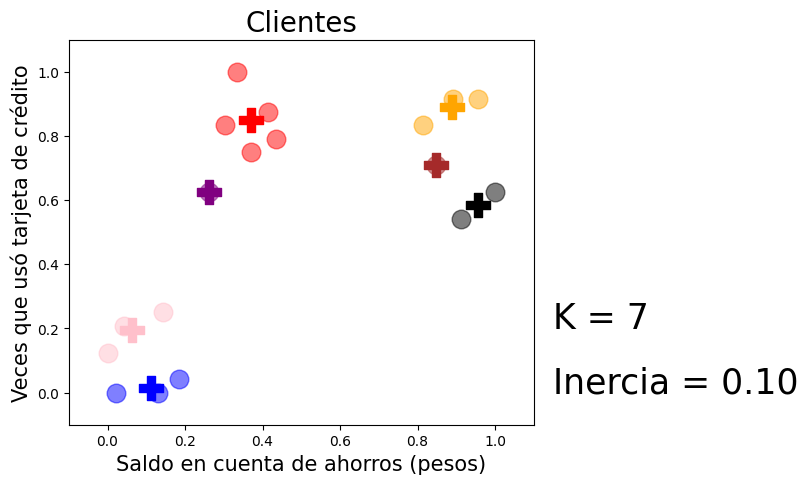

In [ ]:
import pandas as pd  # Importa la biblioteca pandas para manipulación de datos
import matplotlib.pyplot as plt  # Importa matplotlib para la visualización
from sklearn.preprocessing import MinMaxScaler  # Importa MinMaxScaler para escalar datos
from sklearn.cluster import KMeans  # Importa KMeans para el clustering


# Crea un DataFrame de pandas con los datos de los clientes
clientes = pd.DataFrame({"saldo" : [50000, 45000, 48000, 43500, 47000, 52000,
                                    20000, 26000, 25000, 23000, 21400, 18000,
                                    8000, 12000, 6000, 14500, 12600, 7000],

                         "transacciones": [25, 20, 16, 23, 25, 18,
                                           23, 22, 24, 21, 27, 18,
                                           8, 3, 6, 4, 9, 3]})

# Crea un objeto MinMaxScaler y lo ajusta a los datos de los clientes
escalador = MinMaxScaler().fit(clientes.values)

# Escala los datos de los clientes utilizando el MinMaxScaler
clientes = pd.DataFrame(escalador.transform(clientes.values),
                       columns=["saldo", "transacciones"])

# Crea un objeto KMeans con 7 clusters y lo ajusta a los datos escalados
kmeans = KMeans(n_clusters=7).fit(clientes.values)

# Agrega una columna al DataFrame de clientes para indicar el cluster asignado a cada cliente
clientes["cluster"] = kmeans.labels_

# Instrucciones para graficar los clusters
plt.figure(figsize=(6, 5), dpi=100)  # Crea una figura para la gráfica

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]  # Define una lista de colores para los clusters

# Itera a través de cada cluster y grafica los puntos de datos correspondientes
for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacciones"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)  # Grafica los puntos de datos

    # Grafica los centroides de los clusters
    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])

# Agrega títulos y etiquetas a la gráfica
plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)  # Agrega texto para indicar el número de clusters
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)  # Agrega texto para indicar la inercia
plt.xlim(-0.1, 1.1)  # Establece los límites del eje x
plt.ylim(-0.1, 1.1)  # Establece los límites del eje y
plt.show()  # Muestra la gráfica

del clientes["cluster"]  # Elimina la columna "cluster" del DataFrame

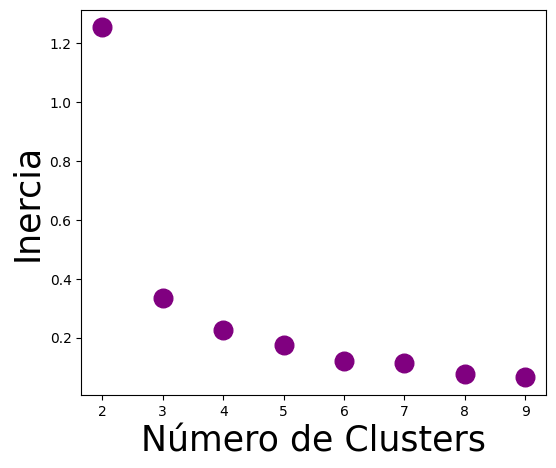

In [ ]:
inercias = []  # Crea una lista vacía para almacenar las inercias

# Itera a través de diferentes valores de k (número de clusters)
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(clientes.values)  # Crea y ajusta un modelo KMeans con k clusters
    inercias.append(kmeans.inertia_)  # Agrega la inercia del modelo a la

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()
